# パーセプトロンのインターフェースをPythonのクラスとして定義
- 新しいパーセプトロンオブジェクトを初期化し、予測を行えるようにする。

このオブジェクトは以下のメソッドで学習と予測を行う。
- fitメソッドでデータから学習を行う。
- predictメソッドで予測を行う。

また、オブジェクトの他のメソッドの呼び出しによって作成される属性には、たとえばself.w_のようにアンダースコアを追加する。


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# ジュピターノートブック上でグラフを表示させるための処理
%matplotlib inline

## パーセプトロンアルゴリズムを使用するためのインターフェースの作成

In [9]:
class Perceptron(object):
    """
    パーセプトロンの分類器
    
    パラメータ:
      eta: float
             学習率（0.0より大きく1.0以下の値）
             
      n_iter: int
                  トレーニングデータのトレーニング回数
    
    属性:
      w_: 1次元配列
             適合後の重み
             
      errors_: リスト
                     各エポックでの誤分類数
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        トレーニングデータに適合させる
        
        パラメータ:
          X: {配列のようなデータ構造}, shape = [n_samples, n_features]
              トレーニングデータ
              n_samplesはサンプルの個数
              n_featuresは特徴量の個数
          
          y: 配列のようなデータ構造, shape = [n_samples]
              目的変数
        
        戻り値:
          self: object
        """
        
        # 1 + X.shape[1]の長さの配列を各要素の初期値を0で作成
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        # トレーニング回数分トレーニングデータを反復
        for _ in range(self.n_iter):
            errors = 0
            
            # 各サンプルで重みを更新
            ## zip(X, y)でXとyの各要素をタプル型で取り出している
            for xi, target in zip(X, y):
                # 重み w1, ... , wmの更新
                ## Δwj = η(y(i) - y(i)^) * x(ij) {j = 1, ... , m}
                update = self.eta * (target - self.predict(xi))
                self.w_[1: ] += update * xi
                
                # 重みw0の更新
                ## Δw0 = η(y(i) - y(i)^)
                self.w_[0] += update
                
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
                
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        """
        総入力を計算
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        1ステップ後のクラスラベルを返す
        """
        # 三項演算子の計算をしている
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Irisデータセットの読み込みと整形

In [3]:
# Irisデータセットの読み込み
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df[0:100]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


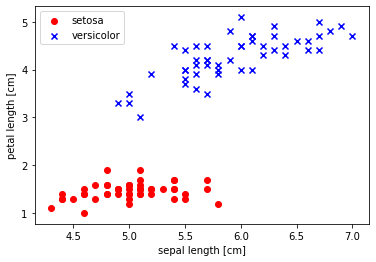

In [7]:
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values

# Iris-setosaを-1、Iris-virginicaを1に変換
## Iris-setosaの場合は-1に、それ以外は1に設定する。
y = np.where(y == 'Iris-setosa', -1, 1)

# 1-100行目の1, 3列目を特徴として抽出
X = df.iloc[0:100, [0, 2]].values

# 品種setosaのプロット（赤の◯）
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（青の×）
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# 図の表示
plt.show()

## 整形したIrisのデータセットをパーセプトロンのアルゴリズムに適用する

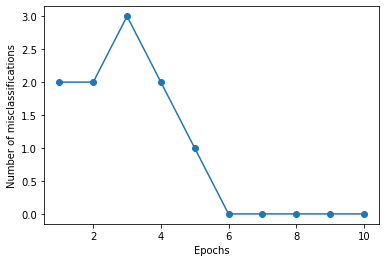

In [10]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)

# トレーニングデータへのモデルの適合
ppn.fit(X, y)

# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

# 図の表示
plt.show()

⬆︎のグラフからわかるように、6回目のエポックの後、パーセプトロンはすでに収束しており、トレーニングサンプルを完璧に分類できるようになっている。

## 2次元のデータセットの決定境界の可視化

In [16]:
# 色のリストからカラーマップを作成するためにListedColormapをインポート
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    ## meshgrid関数を使用し、Irisデータセットと同じ個数の列を持つ行列を作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                                              np.arange(x2_min, x2_max, resolution))
    
   # 各特徴量を1次元配列に変換して予測を実行 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    ## グリッド配列内の予測されたクラスごとに、決定領域をそれぞれ異なる色にマッピングする。
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


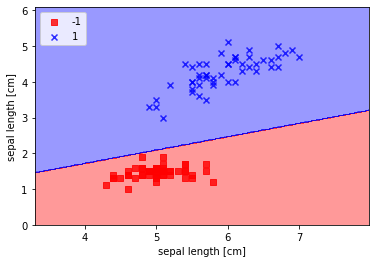

In [17]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)

# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal length [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# 図の表示
plt.show()